In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

from dataset import get_manchester

In [43]:
def fit_line(x, y):
    b0, b1 = np.polyfit(x, y, deg=1)
    plt.plot(x, b0*x+b1)

## Across all sessions

In [77]:
df = pd.read_excel('count every function word.xlsx')

In [78]:
df_mean = df.groupby('label').sum()

In [80]:
df_mean = df_mean/12

### frequency

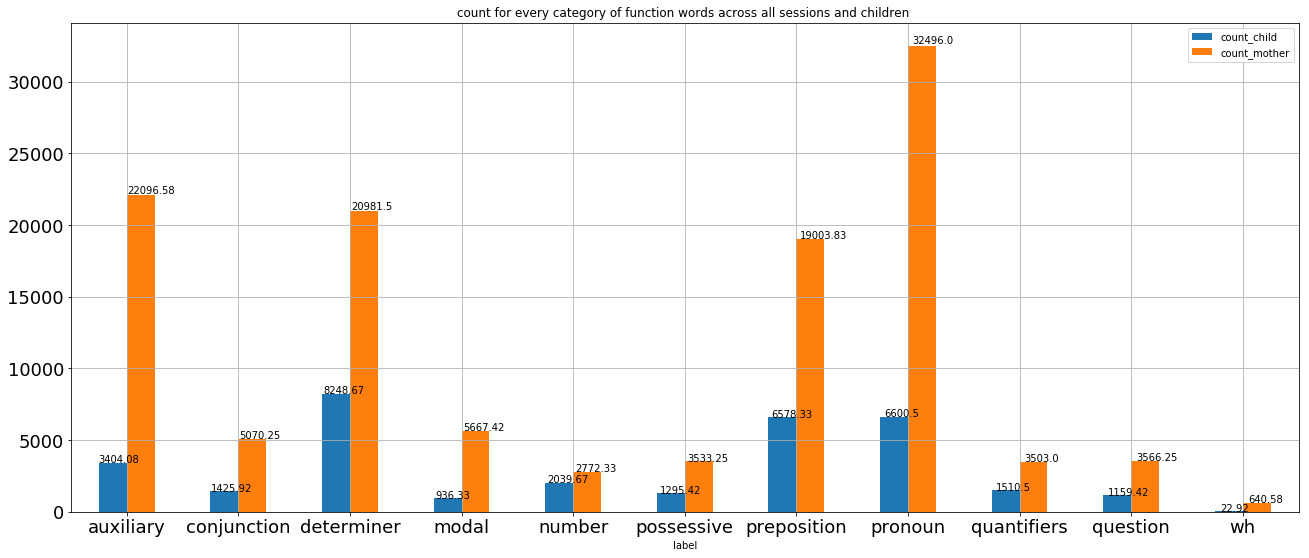

In [82]:
# both child and mother use lots of determiners. 
# 2nd question for child but auxiliary for mother
# 3rd possessive for child but question for mother
# 4th auxiliary for child but 
ax = df_mean.plot.bar(rot=0, title='count for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 2), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

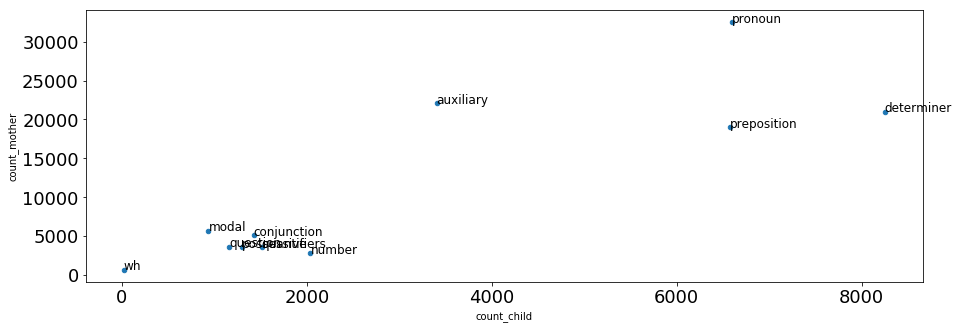

In [83]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
    # semilog scale, proportion, token-type ratios

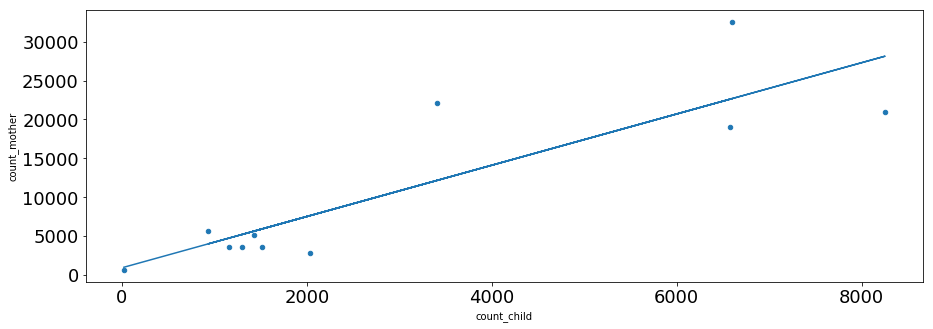

significant
p:  0.0006380086045646931 residuals:  0.6473145768148251


In [84]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
fit_line(x, y)
plt.show()
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
slope,intercept, r_value, p_value, std_err = stats.linregress(x, y)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)

### Proportion

In [102]:
sum_row = df.sum(axis = 0)
df_sum = pd.DataFrame(data=sum_row).T
df_sum=df_sum.reindex(columns=df.columns)
df_sum.index = ['total']
df_sum = df.append(df_sum)

In [103]:
df_sum.loc[:,'count_child':'count_mother':] = df_sum.loc[:,'count_child':'count_mother'].div(df_sum.iloc[-1]['count_child':'count_mother'])

In [104]:
df_sum = df_sum.drop(df_sum.index[-1], axis = 0)

In [105]:
df_sum[['count_child', 'count_mother']] = df_sum[['count_child', 'count_mother']].apply(pd.to_numeric)

In [106]:
df_mean = df_sum.groupby('label').sum()

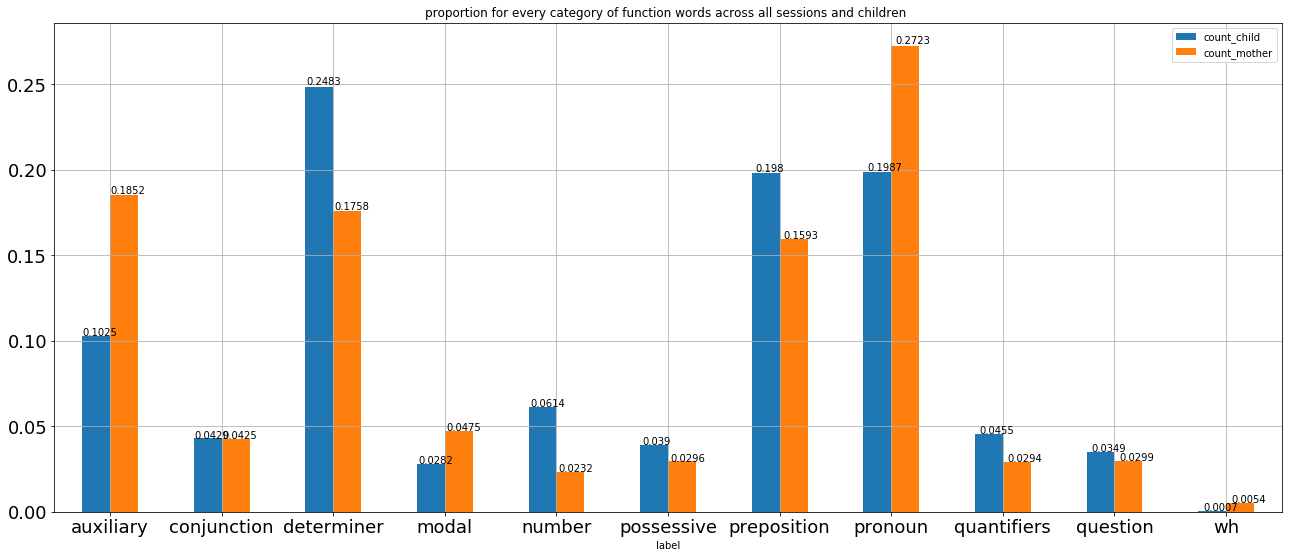

In [107]:
ax = df_mean.plot.bar(rot=0, title='proportion for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 4), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

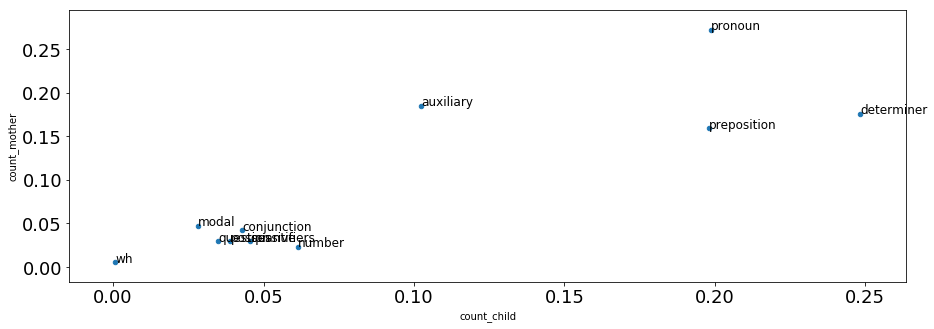

In [108]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)

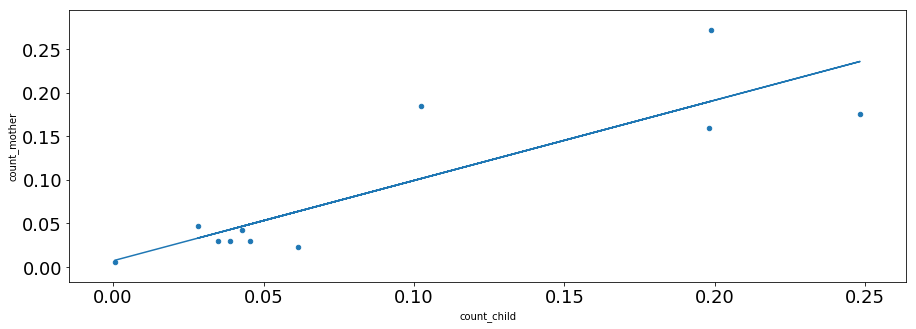

significant
p:  0.0006380086045646906 residuals:  0.18021237601543524


In [109]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
fit_line(x, y)
plt.show()
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
slope,intercept, r_value, p_value, std_err = stats.linregress(x, y)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)

### remove the data of determiner

In [110]:
df_node = df[df.label!='determiner']

In [111]:
sum_row = df.sum(axis = 0)
df_sum = pd.DataFrame(data=sum_row).T
df_sum=df_sum.reindex(columns=df.columns)
df_sum.index = ['total']
df_sum = df_node.append(df_sum)

In [112]:
df_sum.loc[:,'count_child':'count_mother':] = df_sum.loc[:,'count_child':'count_mother'].div(df_sum.iloc[-1]['count_child':'count_mother'])

In [113]:
df_sum = df_sum.drop(df_sum.index[-1], axis = 0)

In [114]:
df_sum[['count_child', 'count_mother']] = df_sum[['count_child', 'count_mother']].apply(pd.to_numeric)

In [115]:
df_mean = df_sum.groupby('label').sum()

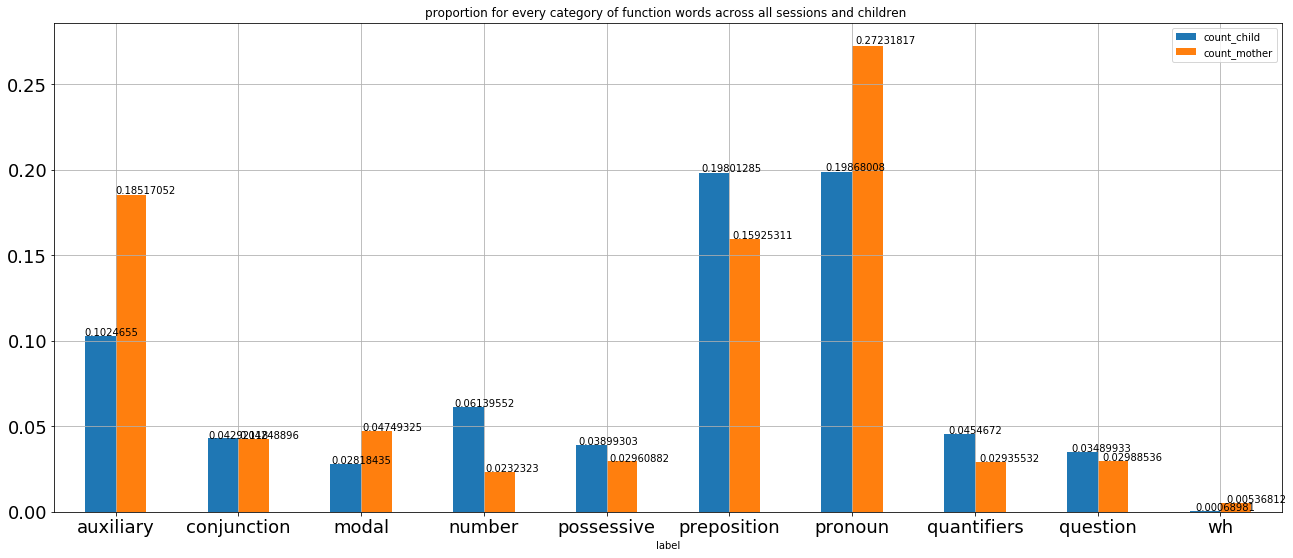

In [116]:
ax = df_mean.plot.bar(rot=0, title='proportion for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 8), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

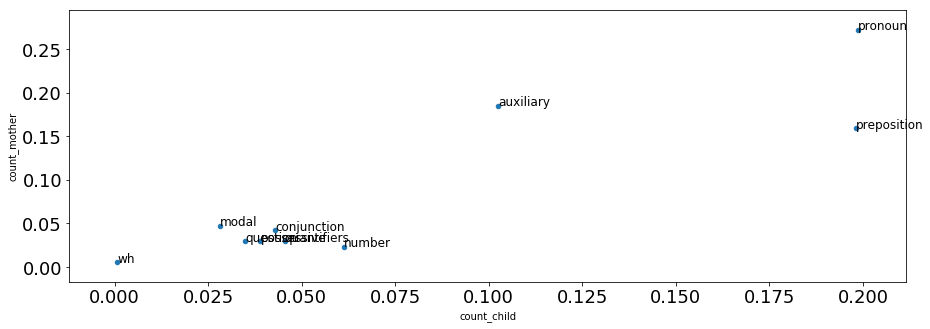

In [117]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)

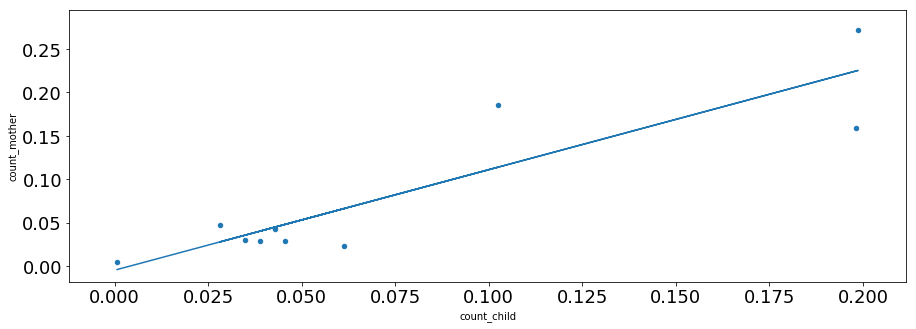

significant
p:  0.0004453683072753968 residuals:  0.20238358647491064


In [118]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
fit_line(x, y)
plt.show()
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
slope,intercept, r_value, p_value, std_err = stats.linregress(x, y)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)

## First and second half

### mean frequency

In [77]:
df17 = pd.read_excel('count function words 17.xlsx')

In [78]:
df_mean = df17.groupby('function').sum()

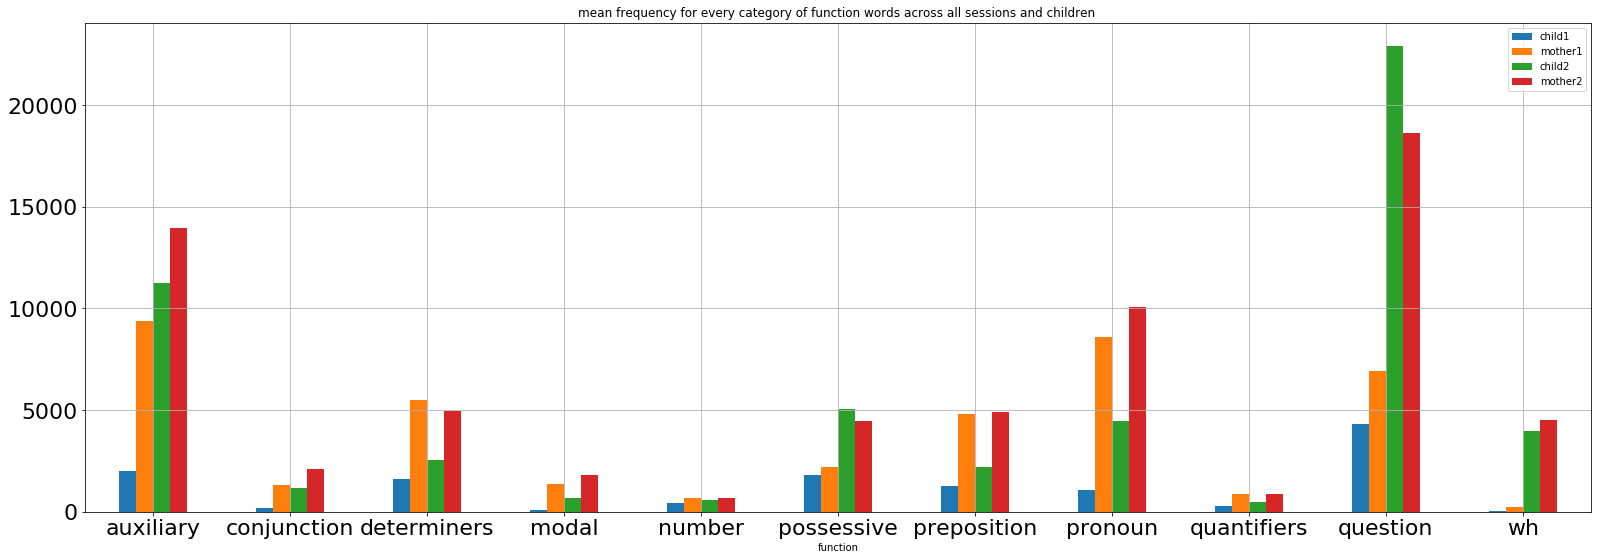

In [79]:
ax = df_mean.plot.bar(rot=0, title='mean frequency for every category of function words across all sessions and children ', figsize=(27,9), fontsize=22, grid = True)
plt.show()

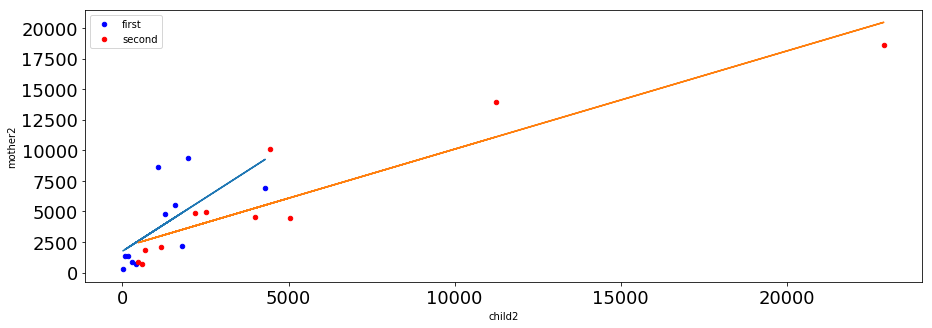

significant
p:  2.9307041444221955e-05 residuals:  0.10401246442704407


In [49]:
x1 = df_mean.child1
y1 = df_mean.mother1
x2 = df_mean.child2
y2 = df_mean.mother2
ax = df_mean.plot.scatter(x='child1', y='mother1', color = 'b', label = 'first', figsize=(15,5), fontsize=18)
df_mean.plot.scatter(x='child2', y='mother2', color = 'r', label = 'second', figsize=(15,5), fontsize=18, ax=ax)
fit_line(x1, y1)
fit_line(x2, y2)
plt.show()
slope,intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)

### Proportion

In [65]:
sum_row = df17.sum(axis = 0)
df_sum = pd.DataFrame(data=sum_row).T
df_sum=df_sum.reindex(columns=df17.columns)
df_sum.index = ['total']
df_sum = df17.append(df_sum)

In [67]:
df_sum.loc[:,'child1':'mother2'] = df_sum.loc[:,'child1':'mother2'].div(df_sum.iloc[-1]['child1':'mother2'])

In [68]:
df_sum = df_sum.drop(df_sum.index[-1], axis = 0)

In [69]:
df_sum[['child1', 'mother1', 'child2','mother2']] = df_sum[['child1','mother1','child2', 'mother2']].apply(pd.to_numeric)

In [70]:
df_mean = df_sum.groupby('function').sum()

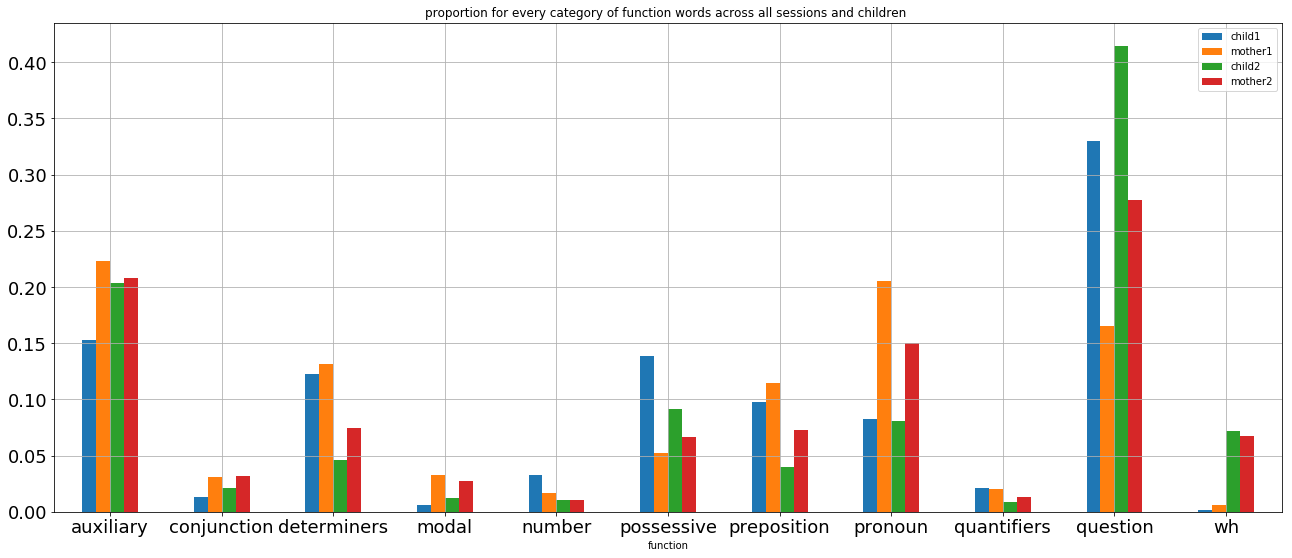

In [74]:
ax = df_mean.plot.bar(rot=0, title='proportion for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
plt.show()

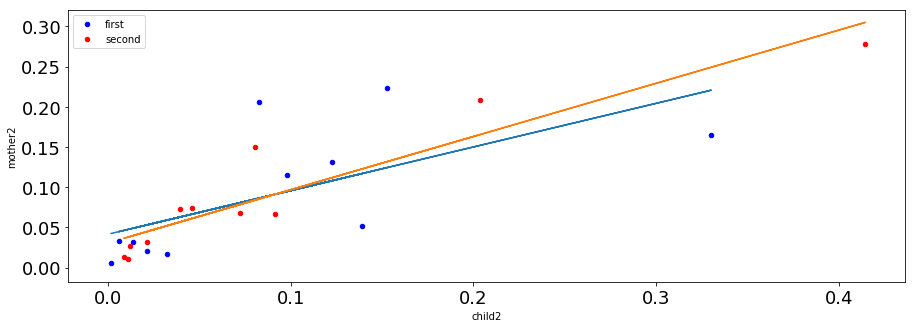

significant
p:  2.9307041444221955e-05 residuals:  0.08570371680921193


In [75]:
x1 = df_mean.child1
y1 = df_mean.mother1
x2 = df_mean.child2
y2 = df_mean.mother2
ax = df_mean.plot.scatter(x='child1', y='mother1', color = 'b', label = 'first', figsize=(15,5), fontsize=18)
df_mean.plot.scatter(x='child2', y='mother2', color = 'r', label = 'second', figsize=(15,5), fontsize=18, ax=ax)
fit_line(x1, y1)
fit_line(x2, y2)
plt.show()
slope,intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)